In [1]:
# import all the required librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Bivariate Analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


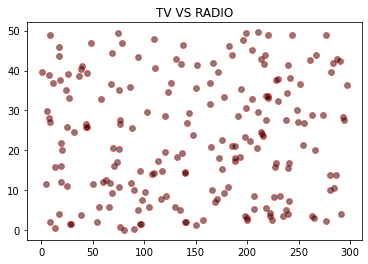

In [6]:
plt.scatter(df['TV'],df['radio'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title("TV VS RADIO")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


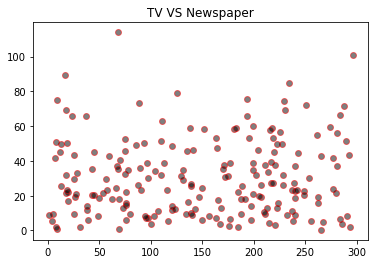

In [7]:
plt.scatter(df['TV'],df['newspaper'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title("TV VS Newspaper")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


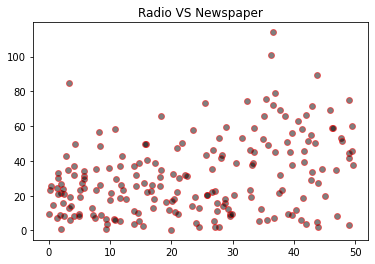

In [8]:
plt.scatter(df['radio'],df['newspaper'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title("Radio VS Newspaper")
plt.show()

In [9]:
corr_mat = df.corr()
corr_mat

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

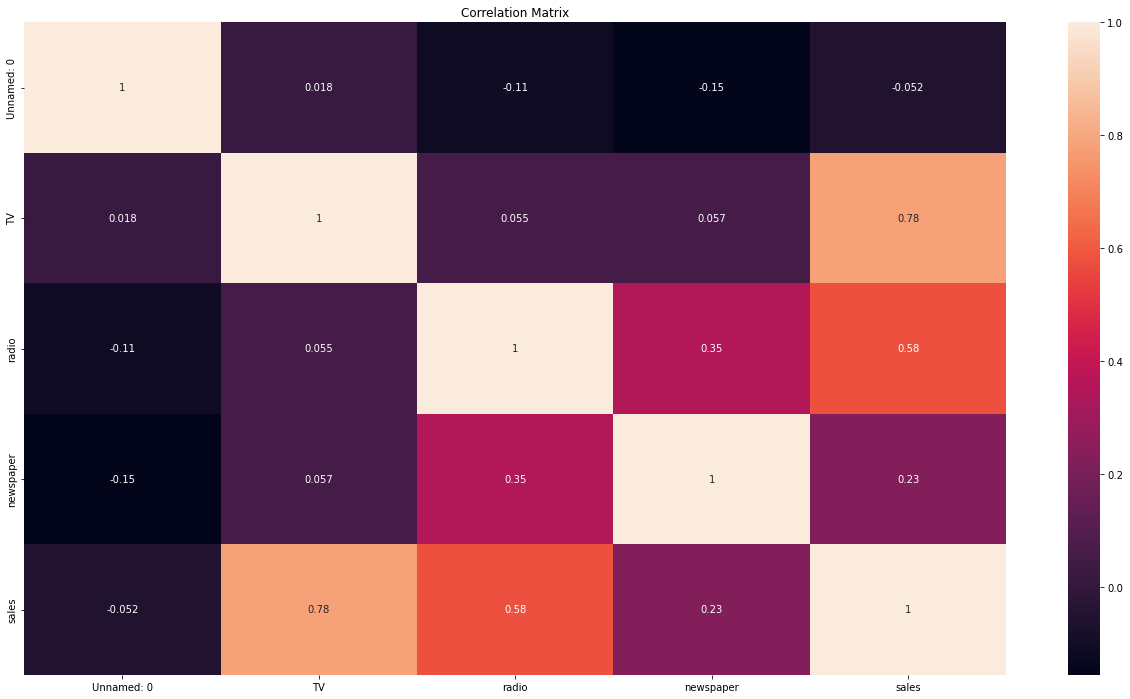

In [10]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

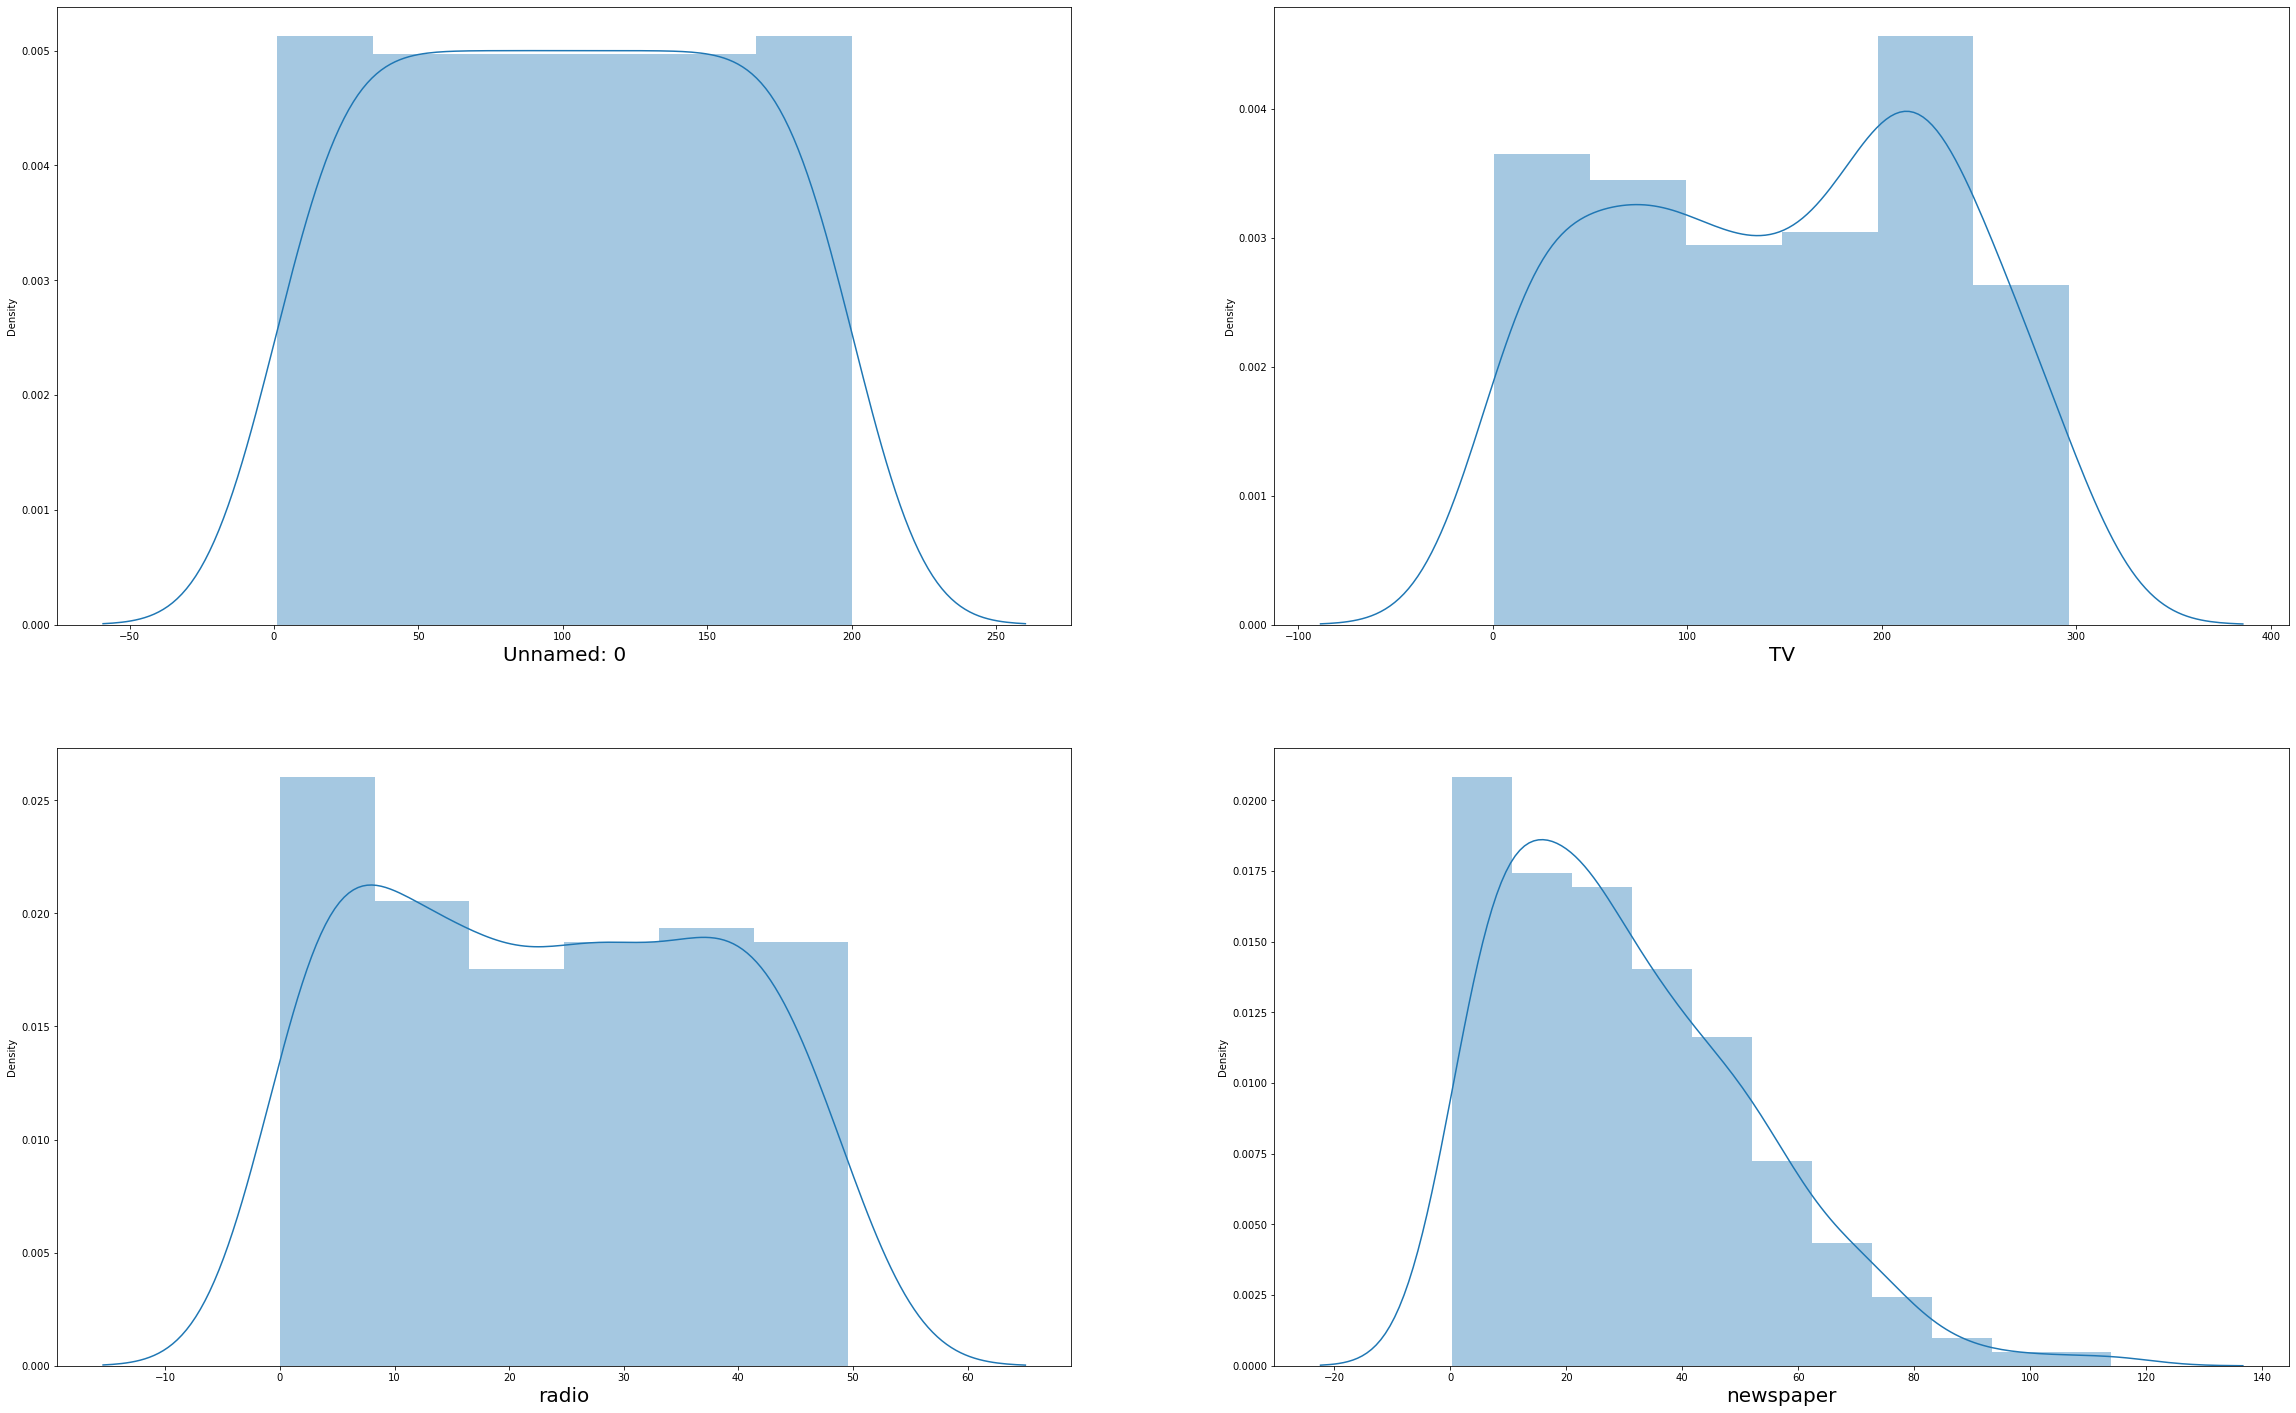

In [11]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=4:
            ax = plt.subplot(2,2,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

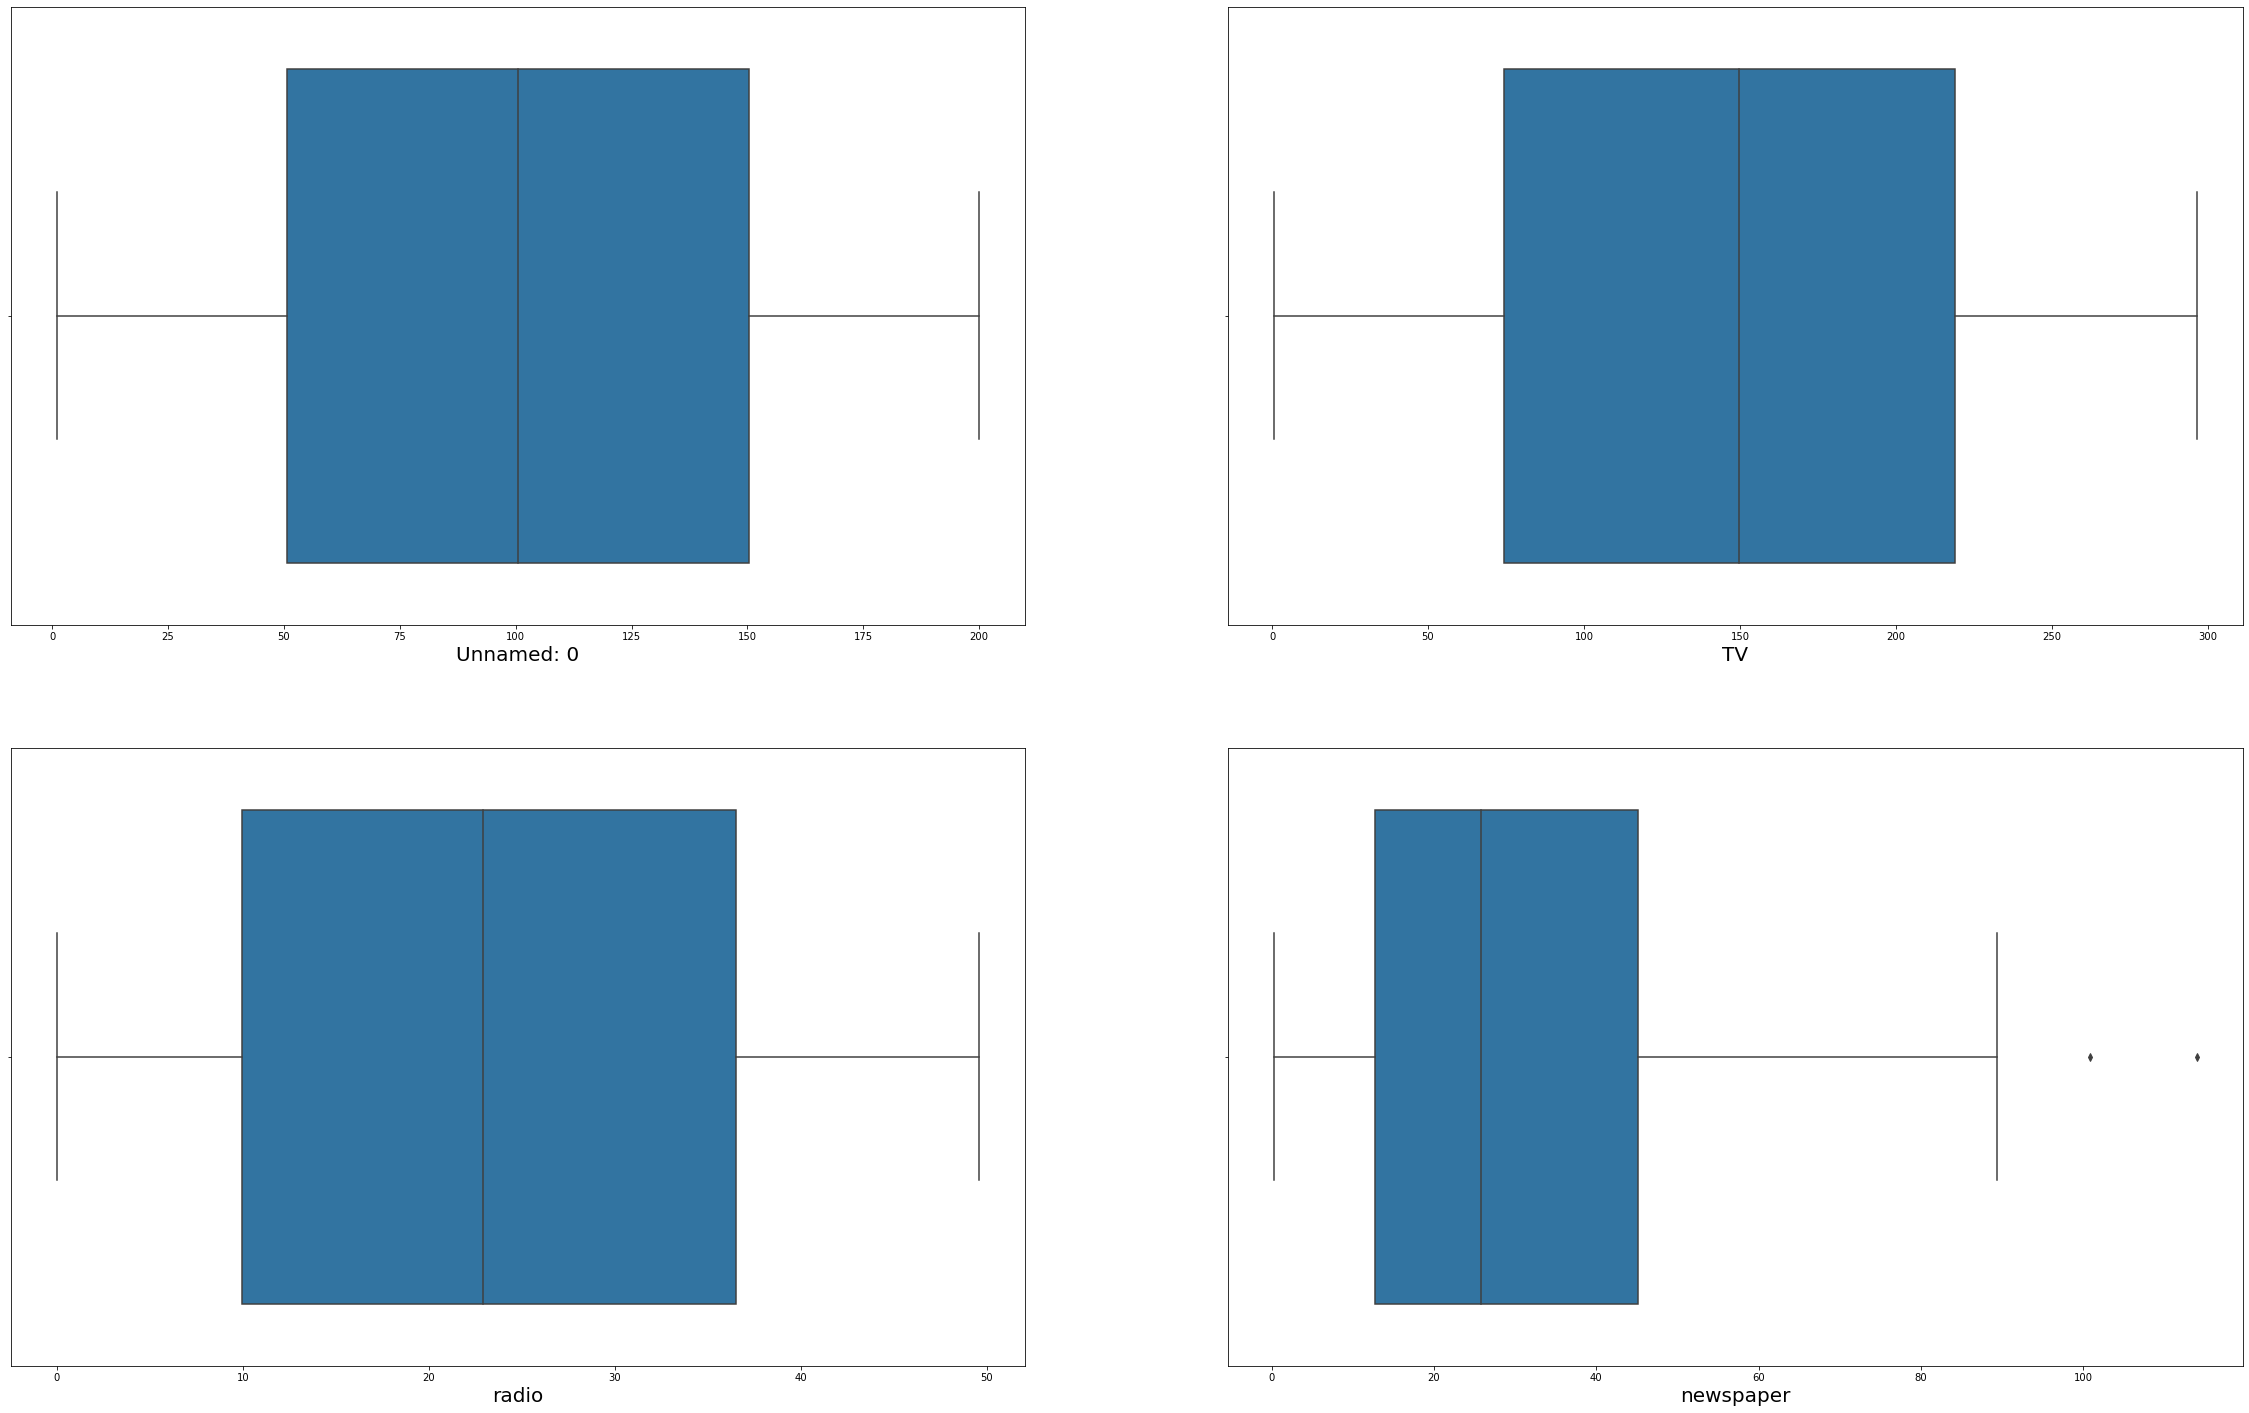

In [12]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=4:
            ax = plt.subplot(2,2,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

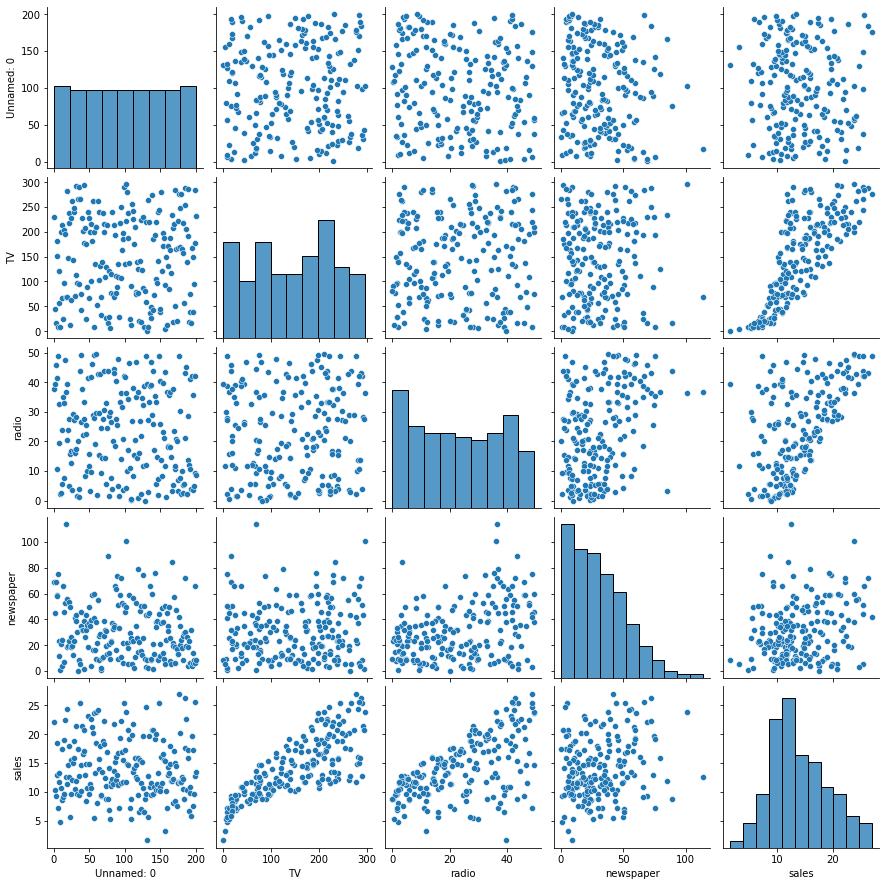

In [13]:
sns.pairplot(df)

In [14]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [15]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df = df.drop(df.index[index])

In [16]:
df.shape

(198, 5)

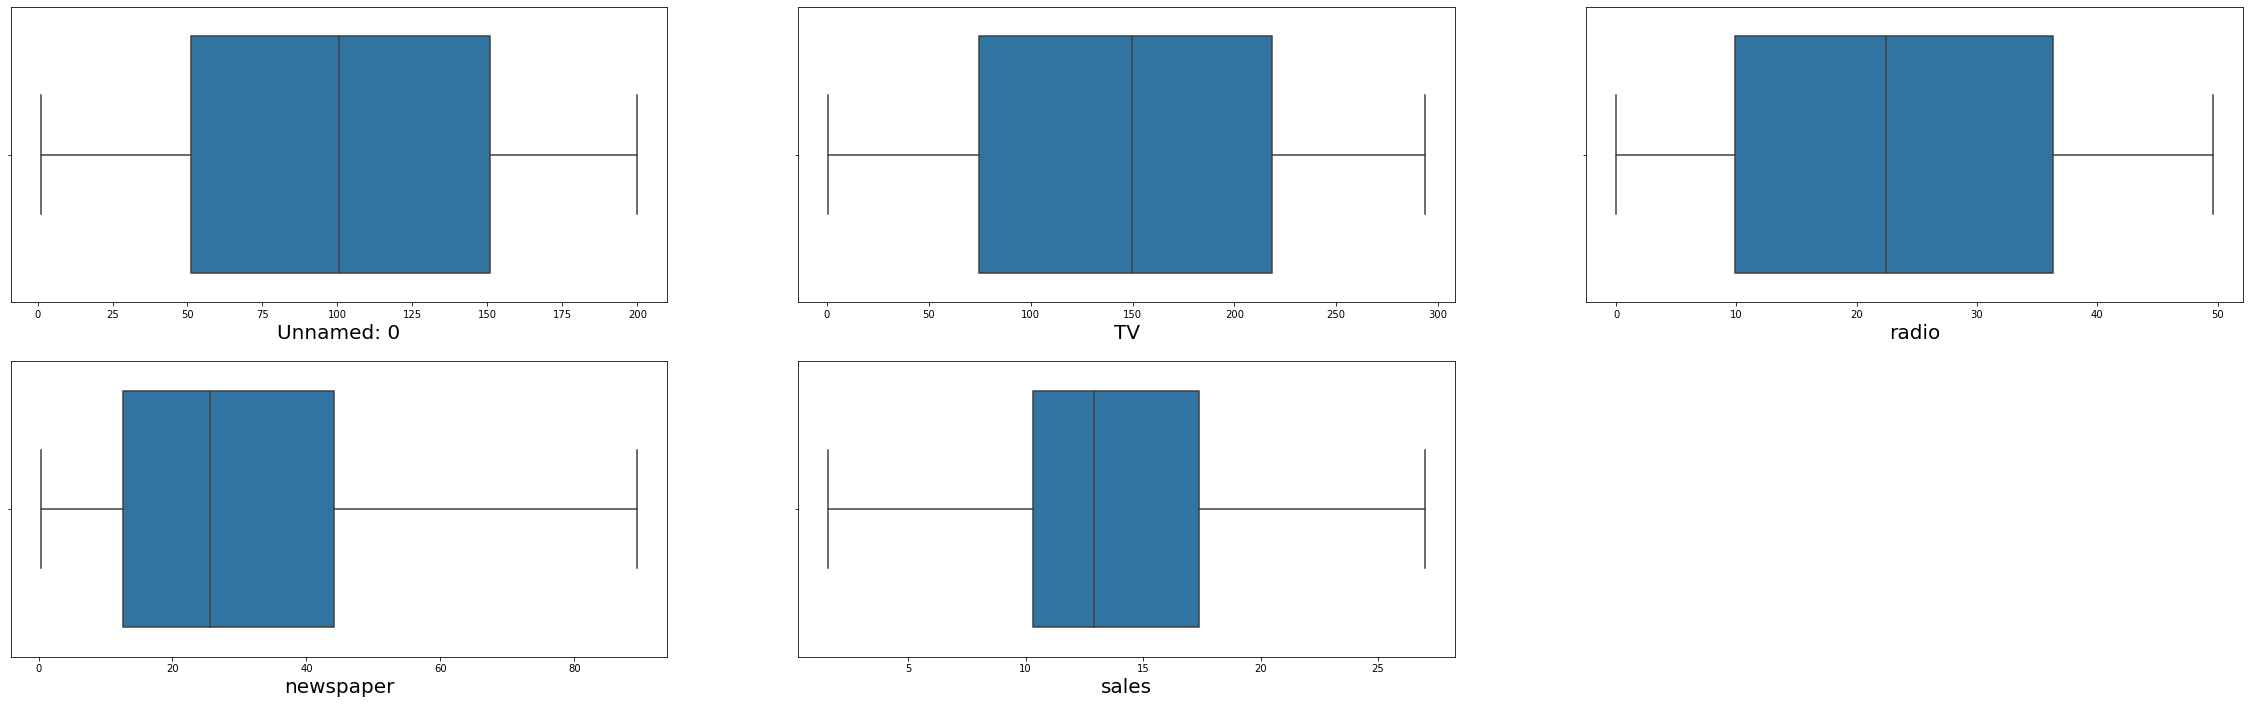

In [17]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [30]:
#seperating my features and label
X = df.drop('sales',axis=1)
y = df['sales'] 

In [31]:
from sklearn.preprocessing import power_transform
X = power_transform(X)

In [32]:
# to scale my features.
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=2)

In [37]:
!pip install xgboost

In [38]:
from xgboost import XGBRegressor
xgb = XGBRegressor()  #Instantiate KNN with k=3
xgb.fit(x_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = xgb.predict(x_test) #Predict 

In [39]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_predict))
r2_xgb = r2_score(y_test, y_predict)

In [40]:
print("The root mean Sq error calculated from the base model is:",rmse_xgb)
print("The r2-score is:",r2_xgb)

The root mean Sq error calculated from the base model is: 1.0720319986135833
The r2-score is: 0.9600578111329955


In [41]:
from sklearn.neighbors import KNeighborsRegressor  # k=3
knn = KNeighborsRegressor(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(x_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(x_test) #Predict

In [42]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

In [43]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 1.8393159960521555
The r2-score is: 0.8824211903098633


In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train , y_train)
pred = lr.predict(x_test)

In [45]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, pred))
r2_1 = r2_score(y_test, pred)

In [46]:
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 1.9556182595259068
The r2-score is: 0.867081775664214


In [47]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = DT.predict(x_test) #Predict

In [48]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2 = r2_score(y_test, y_pred)

In [49]:
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 1.1914277149705725
The r2-score is: 0.9506653830514129


In [50]:
#Building SVR Model
from sklearn.svm import SVR
svr = SVR() #Instantiate the LogisticRegression object
svr.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = svr.predict(x_test) #Predict

In [51]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_3 = r2_score(y_test, y_pred)

In [52]:
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 1.9803188654345645
The r2-score is: 0.8637029006879375


In [53]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() #Instantiate the LogisticRegression object
rf.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf.predict(x_test) #Predict


In [54]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_4 = r2_score(y_test, y_pred)

In [55]:
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 0.9359817706558159
The r2-score is: 0.9695525346767272


In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [57]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [58]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [59]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [60]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [61]:
rf_Grid.best_score_

0.9640361321509352

In [62]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=10,bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=1,min_samples_split=2) #Instantiate the LogisticRegression object
rf1.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf1.predict(x_test)

In [63]:
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_5 = r2_score(y_test, y_pred)

In [64]:
print("The root mean Sq error calculated from the base model is:",rmse5)
print("The r2-score is:",r2_5)

The root mean Sq error calculated from the base model is: 1.1925204622097536
The r2-score is: 0.9505748446354394


In [65]:
#Saving the model in pkl file
import joblib
joblib.dump(rf,"bigdata.pkl")

['bigdata.pkl']

In [66]:
model = joblib.load("bigdata.pkl")

In [67]:
#Predicting the saved model
prediction = model.predict(x_test)

In [68]:
#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

In [69]:
#Saving the result into CSV
prediction.to_csv("Sales.csv",index=True)